In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
wd = '/home/kairat/Keras/dogs-vs-cats'
original_dataset_dir = os.path.join(wd, 'train')
base_dir = os.path.join(wd, 'cats_and_docs_small')
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_docs_dir = os.path.join(train_dir, 'docs')
if not os.path.exists(train_docs_dir):
    os.mkdir(train_docs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_docs_dir = os.path.join(validation_dir, 'docs')
if not os.path.exists(validation_docs_dir):
    os.mkdir(validation_docs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_docs_dir = os.path.join(test_dir, 'docs')
if not os.path.exists(test_docs_dir):
    os.mkdir(test_docs_dir)
for i in range(10000, 11000):
    fname = 'cat.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fname = 'dog.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_docs_dir, fname)
    shutil.copyfile(src, dst)
for i in range(11000, 11500):
    fname = 'cat.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fname = 'dog.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_docs_dir, fname)
    shutil.copyfile(src, dst)
for i in range(11500, 12000):
    fname = 'cat.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    fname = 'dog.{}.jpg'.format(i)
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_docs_dir, fname)
    shutil.copyfile(src, dst)

### Training CNN from scratch (baseline)

In [3]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history1 = model.fit_generator(
    train_generator, steps_per_epoch=100,
    epochs=30, validation_data=validation_generator,
    validation_steps=50)
model.save(os.path.join(wd,'cats_and_docs_small_1.h5'))

Epoch 1/30
100/100 [==============================] - 15s 151ms/step - loss: 0.6760 - acc: 0.5606 - val_loss: 0.6105 - val_acc: 0.5806
Epoch 2/30
100/100 [==============================] - 13s 125ms/step - loss: 0.6346 - acc: 0.6366 - val_loss: 0.6814 - val_acc: 0.5934
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5943 - acc: 0.6843 - val_loss: 0.6186 - val_acc: 0.6631
Epoch 4/30
100/100 [==============================] - 14s 139ms/step - loss: 0.5600 - acc: 0.7063 - val_loss: 0.5814 - val_acc: 0.6508
Epoch 5/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5092 - acc: 0.7478 - val_loss: 0.6294 - val_acc: 0.6954
Epoch 6/30
100/100 [==============================] - 14s 144ms/step - loss: 0.4864 - acc: 0.7666 - val_loss: 0.5750 - val_acc: 0.7139
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4497 - acc: 0.7860 - val_loss: 0.7078 - val_acc: 0.6739
Epoch 8/30
100/100 [==============================] - 1

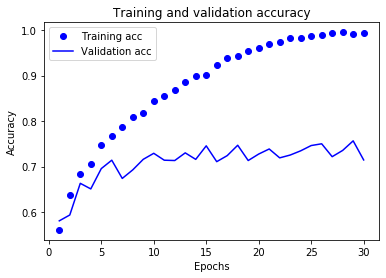

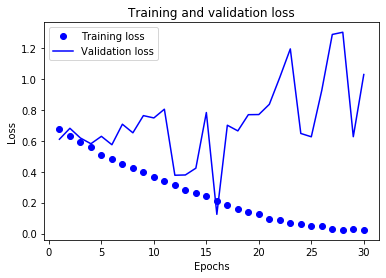

In [6]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc', test_acc)

test acc 0.7347715497016907


### Training CNN from scratch with data augmentation

In [8]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150),
    batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history2 = model.fit_generator(
    train_generator, steps_per_epoch=100,
    epochs=100, validation_data=validation_generator,
    validation_steps=50)
model.save(os.path.join(wd,'cats_and_docs_small_2.h5'))

Epoch 1/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6874 - acc: 0.5300 - val_loss: 0.6686 - val_acc: 0.5615
Epoch 2/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6773 - acc: 0.5716 - val_loss: 0.6490 - val_acc: 0.6282
Epoch 3/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6578 - acc: 0.6143 - val_loss: 0.6309 - val_acc: 0.6396
Epoch 4/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6410 - acc: 0.6225 - val_loss: 0.5576 - val_acc: 0.6256
Epoch 5/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6190 - acc: 0.6569 - val_loss: 0.6107 - val_acc: 0.6662
Epoch 6/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6117 - acc: 0.6721 - val_loss: 0.5080 - val_acc: 0.6759
Epoch 7/100
100/100 [==============================] - 29s 289ms/step - loss: 0.5926 - acc: 0.6878 - val_loss: 0.6596 - val_acc: 0.7094
Epoch 8/100
100/100 [===========================

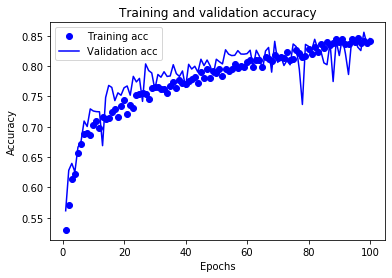

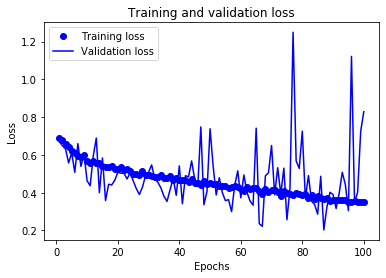

In [11]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc', test_acc)

test acc 0.8324872851371765


### Using pretrained model VGG (feature extraction)

In [13]:
from keras.applications import VGG16

In [14]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150 ,150, 3))

In [15]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = Sequential()
model.add(layers.Dense(256, activation='relu',
                       input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [17]:
history3 = model.fit(train_features, train_labels,
                     epochs=30,
                     batch_size=20,
                     validation_data=(validation_features, validation_labels))
model.save(os.path.join(wd,'cats_and_docs_small_3.h5'))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 519us/step - loss: 0.6050 - acc: 0.6545 - val_loss: 0.4607 - val_acc: 0.8150
Epoch 2/30
2000/2000 [==============================] - 1s 393us/step - loss: 0.4440 - acc: 0.7875 - val_loss: 0.3870 - val_acc: 0.8480
Epoch 3/30
2000/2000 [==============================] - 1s 383us/step - loss: 0.3753 - acc: 0.8265 - val_loss: 0.3444 - val_acc: 0.8540
Epoch 4/30
2000/2000 [==============================] - 1s 384us/step - loss: 0.3278 - acc: 0.8640 - val_loss: 0.3225 - val_acc: 0.8730
Epoch 5/30
2000/2000 [==============================] - 1s 400us/step - loss: 0.3141 - acc: 0.8735 - val_loss: 0.3066 - val_acc: 0.8830
Epoch 6/30
2000/2000 [==============================] - 1s 377us/step - loss: 0.2878 - acc: 0.8670 - val_loss: 0.3110 - val_acc: 0.8710
Epoch 7/30
2000/2000 [==============================] - 1s 378us/step - loss: 0.2687 - acc: 0.8935 - val_loss: 0.2887 - val_acc: 0.8810


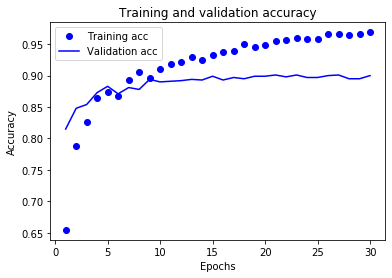

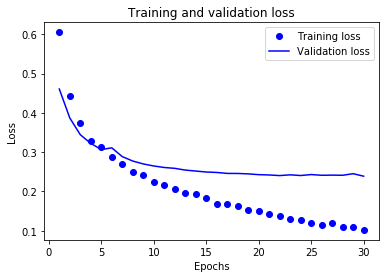

In [18]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('test acc', test_acc)

1000/1000 [==============================] - 0s 143us/step
test acc 0.8840000033378601


### Using pretrained model VGG (freezing)

In [20]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
history4 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
model.save(os.path.join(wd,'cats_and_docs_small_4.h5'))

Epoch 1/30
100/100 [==============================] - 37s 371ms/step - loss: 0.5856 - acc: 0.7035 - val_loss: 0.5706 - val_acc: 0.8160
Epoch 2/30
100/100 [==============================] - 33s 326ms/step - loss: 0.4569 - acc: 0.8018 - val_loss: 0.3623 - val_acc: 0.8473
Epoch 3/30
100/100 [==============================] - 33s 326ms/step - loss: 0.4207 - acc: 0.8084 - val_loss: 0.3734 - val_acc: 0.8756
Epoch 4/30
100/100 [==============================] - 34s 336ms/step - loss: 0.3904 - acc: 0.8280 - val_loss: 0.2367 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 33s 330ms/step - loss: 0.3717 - acc: 0.8339 - val_loss: 0.1795 - val_acc: 0.8858
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.3600 - acc: 0.8412 - val_loss: 0.2150 - val_acc: 0.8918
Epoch 7/30
100/100 [==============================] - 33s 326ms/step - loss: 0.3651 - acc: 0.8373 - val_loss: 0.1565 - val_acc: 0.9048
Epoch 8/30
100/100 [==============================] - 3

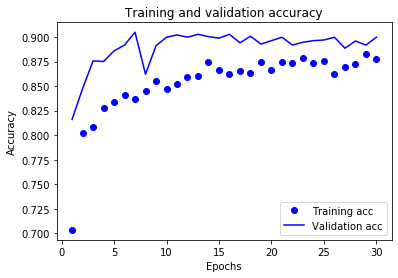

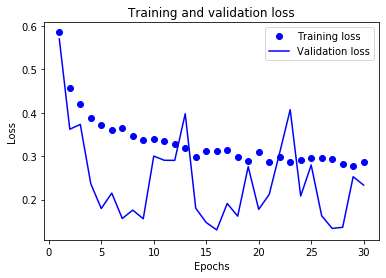

In [22]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc', test_acc)

test acc 0.8838832378387451


### Using pretrained model VGG (fine-tuning)

In [25]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [26]:
history5 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
model.save(os.path.join(wd,'cats_and_docs_small_5.h5'))

Epoch 1/100
100/100 [==============================] - 35s 352ms/step - loss: 0.2752 - acc: 0.8769 - val_loss: 0.1617 - val_acc: 0.8877
Epoch 2/100
100/100 [==============================] - 33s 330ms/step - loss: 0.2516 - acc: 0.8916 - val_loss: 0.3135 - val_acc: 0.8814
Epoch 3/100
100/100 [==============================] - 32s 323ms/step - loss: 0.2299 - acc: 0.9009 - val_loss: 0.2824 - val_acc: 0.8978
Epoch 4/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2046 - acc: 0.9193 - val_loss: 0.2305 - val_acc: 0.9149
Epoch 5/100
100/100 [==============================] - 32s 324ms/step - loss: 0.1927 - acc: 0.9176 - val_loss: 0.2431 - val_acc: 0.9175
Epoch 6/100
100/100 [==============================] - 30s 305ms/step - loss: 0.1757 - acc: 0.9277 - val_loss: 0.0447 - val_acc: 0.9175
Epoch 7/100
100/100 [==============================] - 32s 322ms/step - loss: 0.1679 - acc: 0.9315 - val_loss: 0.2326 - val_acc: 0.8915
Epoch 8/100
100/100 [===========================

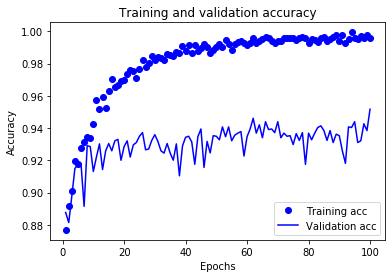

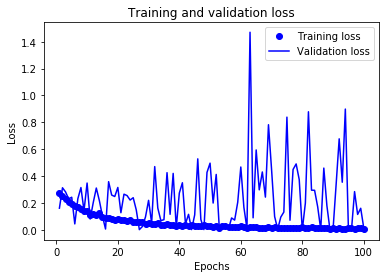

In [27]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc', test_acc)

test acc 0.9397208094596863
